In [1]:
#import
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# from matplotlib import style
import seaborn as sns
%matplotlib inline

import acquire as a
import prepare as prep


from IPython.display import display, display_html

# acquire

- we aquire a data set  from "anonymized-curriculum-access-07-2021.txt (df1)
- we acquire cohorts table from sql (df2)
- we merge both tables df1 and df2 using left join so we can keep all df1 observations and columns and add df2 columns
- before the merge we drop colums ['deleted_at' , 'slack']

In [2]:
df = a.acquire()

In [3]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [4]:
a.miss_dup_values(df)

Your selected dataframe has 11 columns.
There are 8 columns that have missing values.
  
** There are 394392 duplicate rows that represents 38.71% of total Values**


,Missing Values,% of Total Values
name,64497,6.3
start_date,64497,6.3
end_date,64497,6.3
created_at,64497,6.3
updated_at,64497,6.3
program_id,64497,6.3
cohort_id,53497,5.3
endpoint,1,0.0


# Prepare

In [5]:
#use my functions
df = prep.prepare(df)

In [6]:
a.miss_dup_values(df)

Your selected dataframe has 10 columns.
There are 4 columns that have missing values.
  
** There are 805477 duplicate rows that represents 79.06% of total Values**


,Missing Values,% of Total Values
created_at,64497,6.3
updated_at,64497,6.3
cohort_id,53497,5.3
name,53497,5.3


In [7]:
df.cohort_id.value_counts().sort_index()

1.0      19063
2.0         95
4.0          4
5.0          1
6.0         72
7.0        833
8.0       1712
9.0          5
11.0       253
12.0       302
13.0      2848
14.0      9596
15.0       691
16.0       755
17.0      4960
18.0      2257
19.0      1371
21.0      7444
22.0     31258
23.0     28581
24.0     35707
25.0     25680
26.0     27811
27.0     20864
28.0     96954
29.0     38198
31.0     25372
32.0     29754
33.0     40858
34.0     27261
51.0     35381
52.0     28177
53.0     37043
55.0     22063
56.0     34172
57.0     34919
58.0     30137
59.0     32871
61.0     18212
62.0     39316
132.0    24978
133.0    18371
134.0    21095
135.0    34093
137.0    21435
138.0    23744
139.0    17745
165.0     9171
166.0     1829
Name: cohort_id, dtype: int64

**prepare**
- we find 165 and 166 cohorts_id whithout name so we assigned a new name
- we fill na with zero ['start_date', 'end_date', 'program_id']
- change start_date, end_date and date change to date type
- set date to index
- drop a row with null value in endpoint column
    

**1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?**

In [8]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [9]:
# value counts by endpoint
df.endpoint.value_counts()

/                                                   55544
search/search_index.json                            22341
javascript-i                                        21330
toc                                                 20543
html-css                                            15334
                                                    ...  
.                                                       1
extra-challenges/facebook-clone                         1
examples/bootstrap/pizza.png%22);                       1
storytelling/bad-charts/misleading1_baseball.jpg        1
php_i/gitbook/images/favicon.ico                        1
Name: endpoint, Length: 2406, dtype: int64

Note : '/' and 'search/search_index.json' are not lessons so we need to exclude them

In [10]:
# value counts of endpoint excluding '/'
df[(df.endpoint != '/') & (df.endpoint != 'search/search_index.json') ].endpoint.value_counts()

javascript-i                21330
toc                         20543
html-css                    15334
java-iii                    15245
java-ii                     14593
                            ...  
6_Project.json                  1
ltc-python                      1
prework/cli/03-filepaths        1
capsones/151                    1
data-science-pipeline           1
Name: endpoint, Length: 2404, dtype: int64

we need by program:

    0- NO REGISTER
    1 - Full stack PHP
    2 - Java
    3 - Data Science
    4 - Front End Program


In [11]:
#create a data frame that has value counts  of endpoint per program
program_df = pd.DataFrame(df[(df.endpoint != '/') & (df.endpoint != 'search/search_index.json')].groupby('program_id')['endpoint'].value_counts())

In [12]:
program_df.head()

endpoint
program_id endpoint                                    
0.0        toc                                      911
           javascript-i                             896
           spring                                   659
           java-iii                                 580
           fundamentals/AI-ML-DL-timeline.jpg       576

In [13]:
#rename a column
program_df.rename(columns= {'endpoint':'endpnt_cnt'}, inplace = True)

In [14]:
program_df.head()

endpnt_cnt
program_id endpoint                                      
0.0        toc                                        911
           javascript-i                               896
           spring                                     659
           java-iii                                   580
           fundamentals/AI-ML-DL-timeline.jpg         576

In [15]:
#lets see how to get each program

In [16]:
var =program_df.loc[4].head(5)
var

,endpnt_cnt
endpoint,
content/html-css,2
content/html-css/gitbook/images/favicon.ico,1
content/html-css/introduction.html,1


In [17]:
prog_list = [0,1,2,3,4]

In [18]:
print("********************* TOP 5  PAGES  PER PROGRAM  *********************")
print('')
for  prog in prog_list:
    var =program_df.loc[prog].head(5)
    print('                         PROGRAM', prog)
    display (var)
    print ('----------------------------------------------------')
    print('')

********************* TOP 5  PAGES  PER PROGRAM  *********************

                         PROGRAM 0


,endpnt_cnt
endpoint,
toc,911
javascript-i,896
spring,659
java-iii,580
fundamentals/AI-ML-DL-timeline.jpg,576


----------------------------------------------------

                         PROGRAM 1


,endpnt_cnt
endpoint,
javascript-i,1144
index.html,1011
html-css,979
javascript-i/javascript-with-html,832
javascript-i/introduction/working-with-data-types-operators-and-variables,612


----------------------------------------------------

                         PROGRAM 2


,endpnt_cnt
endpoint,
javascript-i,19280
toc,19221
java-iii,14153
html-css,13777
java-ii,13585


----------------------------------------------------

                         PROGRAM 3


,endpnt_cnt
endpoint,
classification/overview,2455
classification/scale_features_or_not.svg,2302
sql/mysql-overview,1723
1-fundamentals/modern-data-scientist.jpg,1661
1-fundamentals/AI-ML-DL-timeline.jpg,1657


----------------------------------------------------

                         PROGRAM 4


,endpnt_cnt
endpoint,
content/html-css,2
content/html-css/gitbook/images/favicon.ico,1
content/html-css/introduction.html,1


----------------------------------------------------



In [19]:
most_views_df= pd.DataFrame(columns={'program_id'})
final = pd.DataFrame()
for prog  in prog_list:
    print(prog)
    var= program_df.loc[prog]
    y = var.nlargest(1, 'endpnt_cnt')
    most_views_df= pd.concat([most_views_df, y], ignore_index = False)


0
1
2
3
4


In [20]:
most_views_df

,program_id,endpnt_cnt
toc,NaN,911.0
javascript-i,NaN,1144.0
javascript-i,NaN,19280.0
classification/overview,NaN,2455.0
content/html-css,NaN,2.0


In [21]:
most_views_df['program_id']= prog_list

In [22]:
most_views_df =most_views_df.sort_values(by='program_id').reset_index().set_index('program_id').rename(columns={'index':'endpoint'})

In [23]:
most_views_df

,endpoint,endpnt_cnt
program_id,,
0,toc,911.0
1,javascript-i,1144.0
2,javascript-i,19280.0
3,classification/overview,2455.0
4,content/html-css,2.0


In [24]:
#create a a new df that contains the top page for each program

In [25]:
most_views_df.sort_values('endpnt_cnt', ascending=False)

,endpoint,endpnt_cnt
program_id,,
2,javascript-i,19280.0
3,classification/overview,2455.0
1,javascript-i,1144.0
0,toc,911.0
4,content/html-css,2.0


In [26]:
programs = {
        0 : 'Unknown',
        1 : 'Full Stack PHP',
        2 : 'Java',
        3 : 'Data Science',
        4 : 'Front End Program'
}

In [27]:
most_views_df['program_name']=most_views_df.index.map(programs)

In [28]:
most_views_df.sort_values('endpnt_cnt', ascending= False)

,endpoint,endpnt_cnt,program_name
program_id,,,
2,javascript-i,19280.0,Java
3,classification/overview,2455.0,Data Science
1,javascript-i,1144.0,Full Stack PHP
0,toc,911.0,Unknown
4,content/html-css,2.0,Front End Program


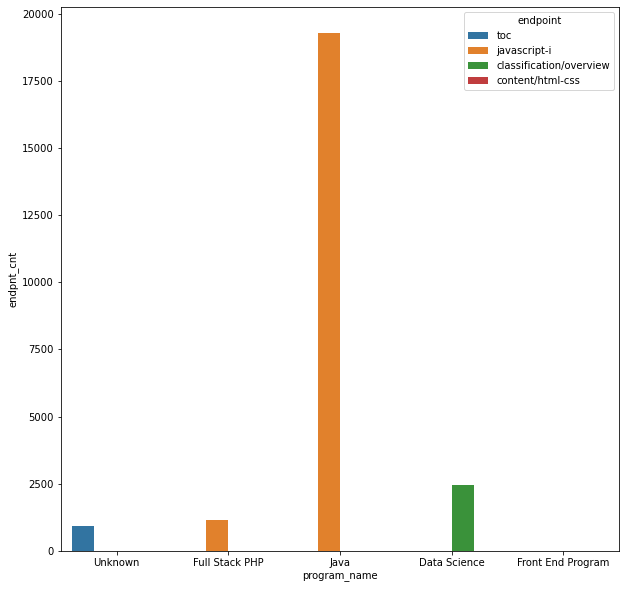

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(x ='program_name', y = 'endpnt_cnt', data = most_views_df,hue = 'endpoint' ,)
plt.show()

**7. Which lessons are least accessed?**

In [82]:
# create a datafrme that has the count by endpoint
endpoint_df = pd.DataFrame(df[(df.endpoint != '/') & (df.endpoint != 'search/search_index.json') ].endpoint.value_counts())

In [83]:
#df[(df.endpoint != '/') & (df.endpoint != 'search/search_index.json') ].groupby('endpoint').count().sort_values(by = 'user_id', ascending= False)

In [84]:
endpoint_df.head()

,endpoint
javascript-i,21330
toc,20543
html-css,15334
java-iii,15245
java-ii,14593


In [85]:
#reset index and rename colums
endpoint_df =endpoint_df.reset_index().rename(columns = {'endpoint' : 'ep_count', 'index': 'endpoint'})

In [86]:
endpoint_df.tail(10)

,endpoint,ep_count
2394,mysql//ntellij,1
2395,regression/explore-old,1
2396,quize/98,1
2397,7.04.02_Hierarchical,1
2398,interview_questions,1
2399,6_Project.json,1
2400,ltc-python,1
2401,prework/cli/03-filepaths,1
2402,capsones/151,1
2403,data-science-pipeline,1


In [87]:
#get a df with the least accessed endpoint 
least_accessed = endpoint_df[endpoint_df.ep_count  == 1]

In [88]:
#endpoint_df[endpoint_df.ep_count  == 2]

In [89]:

#endpoint_df[endpoint_df.ep_count  == 3]

In [37]:
least_accessed

,endpoint,ep_count
1902,stats-assessment,1
1903,4-python/overview,1
1904,appendix/further-reading/html-css,1
1905,capstone/index,1
1906,java-i/control-stateedabitments-and-loops,1
...,...,...
2399,6_Project.json,1
2400,ltc-python,1
2401,prework/cli/03-filepaths,1
2402,capsones/151,1


In [38]:
#getting the list wiht the endpoint
en_list = least_accessed['endpoint'].to_list()

In [41]:
df.head()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [44]:
#compare 
df['endpoint',[df['endpoint'] == en_list[0]]


,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2020-03-29,stats-assessment,578,55.0,104.5.217.57,Curie,2020-02-03,2020-07-07,2020-02-03 19:31:51,2020-02-03 19:31:51,3.0


In [90]:
#create a for loop to get the whole information about the least accessed endpoint
least_views_df= pd.DataFrame()
for n in range (len(en_list)):
    x =df[df['endpoint'] == en_list[n]]
    least_views_df= pd.concat([least_views_df, x], ignore_index = False)
    

In [91]:
#sortby index so it is sort by date
least_views_df.sort_index()

,endpoint,user_id,cohort_id,source_ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,
2018-01-26,javascript/google-maps-api,38,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0
2018-01-27,teams/13,1,8.0,72.177.226.58,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-30,asdf,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-31,javascript/loops,47,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0
2018-02-07,home,53,14.0,97.105.19.61,Lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-27,registerr,53,28.0,65.43.115.179,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0
2021-07-01,fitbit-data,910,137.0,69.232.101.215,Florence,2021-03-15,2021-09-03,2021-03-15 18:18:20,2021-03-15 18:18:20,3.0
2021-07-06,regression/acquire-and-prep-old,851,133.0,130.45.49.89,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0


In [64]:
#we can see the least accessed endpoint by program
least_views_df.groupby('program_id')[['endpoint']].count()

,endpoint
program_id,
0.0,46
1.0,67
2.0,320
3.0,69


In [65]:
#we can see the least accessed endpoint by cohort
least_views_df.groupby('cohort_id')[['endpoint']].count()

,endpoint
cohort_id,
1.0,12
7.0,9
8.0,14
12.0,1
13.0,10
14.0,15
15.0,1
17.0,4
18.0,1


In [75]:
least_views_df[['endpoint',	'user_id',	'cohort_id','source_ip','name', 'program_id']].head()

,endpoint,user_id,cohort_id,source_ip,name,program_id
date,,,,,,
2020-03-29,stats-assessment,578,55.0,104.5.217.57,Curie,3.0
2019-09-23,4-python/overview,1,28.0,97.105.19.58,Staff,2.0
2020-08-17,appendix/further-reading/html-css,64,28.0,71.150.217.33,Staff,2.0
2020-07-28,capstone/index,64,28.0,71.150.217.33,Staff,2.0
2019-11-22,java-i/control-stateedabitments-and-loops,495,51.0,97.105.19.58,Deimos,2.0


In [94]:
print('the least accessed lessons')
display (least_views_df[['endpoint',	'user_id',	'cohort_id','source_ip','name', 'program_id']].sort_index())

the least accessed lessons


,endpoint,user_id,cohort_id,source_ip,name,program_id
date,,,,,,
2018-01-26,javascript/google-maps-api,38,21.0,97.105.19.61,Sequoia,2.0
2018-01-27,teams/13,1,8.0,72.177.226.58,Hampton,1.0
2018-01-30,asdf,1,8.0,97.105.19.61,Hampton,1.0
2018-01-31,javascript/loops,47,21.0,97.105.19.61,Sequoia,2.0
2018-02-07,home,53,14.0,97.105.19.61,Lassen,1.0
...,...,...,...,...,...,...
2021-06-27,registerr,53,28.0,65.43.115.179,Staff,2.0
2021-07-01,fitbit-data,910,137.0,69.232.101.215,Florence,3.0
2021-07-06,regression/acquire-and-prep-old,851,133.0,130.45.49.89,Easley,3.0
